# The Second Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. Separate reports (pdf, word, etc.) are _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook you are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution.*Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Parag Shendye 384146
    2. Muhammad Hassan Maqsood 403346
    3. Prantik Chatterjee 391350


## Preprocessing of the Dataset (5 points)

The provided data set *air_pollution* contains hourly results of measuring the concentration of certain substances (CO, Benzene, NO2, particulate matter) and environmental conditions (temperature, relative humidity, traffic volume). This data was collected near a busy street in a city center by an automated device.

 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'air_pollution' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'air_pollution_2.csv' dataset and use that for the next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [1]:
#your code
import pandas as pd
df=pd.read_csv("AssignmentSecondPartDatasets/air_pollution.csv", index_col=None)
main_df=df.sample(frac=0.9, random_state=384146)
#main_df.to_csv("AssignmentSecondPartDatasets/air_pollution_2.csv", index=False)

In [2]:
main_df.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%),Traffic_Volume,Particulate_Matter
6607,11.12.04,1:00:00,1.6,4.4,121,12.5,24.0,NaN,NaN
1447,10.05.04,2:00:00,-200.0,1.8,-200,14.4,60.1,118.812681,65.168569
1343,05.05.04,18:00:00,3.0,14.6,103,17.1,61.5,53.890418,127.940430
5457,24.10.04,21:00:00,1.3,7.3,72,21.2,63.4,NaN,NaN
5314,18.10.04,1:00:00,-200.0,4.4,-200,14.8,64.3,NaN,NaN


For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'), but without the features *Traffic_Volume* and *Particulate_Matter*. Remove those columns before answering the questions.

In [3]:
#import libraries and data set
import pandas as pd
import numpy as np
import datetime 

coloumns_to_drop = ["Traffic_Volume","Particulate_Matter"]

data_pp = main_df.drop(coloumns_to_drop,axis=1)
data_pp.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%)
6607,11.12.04,1:00:00,1.6,4.4,121,12.5,24.0
1447,10.05.04,2:00:00,-200.0,1.8,-200,14.4,60.1
1343,05.05.04,18:00:00,3.0,14.6,103,17.1,61.5
5457,24.10.04,21:00:00,1.3,7.3,72,21.2,63.4
5314,18.10.04,1:00:00,-200.0,4.4,-200,14.8,64.3


In [4]:
data_pp["Time"]=pd.to_datetime(data_pp["Time"]).dt.time #converting string to datetime type 
data_pp["Date"]=pd.to_datetime(data_pp["Date"]).dt.date#converting string to datetime type 

(a) We want to get a first impression of the data. To achieve this, compute and show the following:
    - the column names (names of the features)
    - the data type of each feature
    - for time features: the minimum and maximum
    - for numerical (non-time) features: the mean, standard deviation, minimum and maximum
    - for categorical features: the number of classes and the value of the most frequent class

In [5]:
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

In [6]:
#your code
print("Column names: Data type")
print("")
for each_feature in data_pp.columns:
    print(each_feature +" : "+ str(data_pp[each_feature].dtype))

print("")
print("Time feature details:")
print("")

Time_features = ["Date","Time"]
print("max_time: {}, min_time: {}".format(max(data_pp["Time"]),min(data_pp["Time"])))
print("")

# max_date = 
# print("max_date: {}, min_date: {}".format(max(data_pp["Date"]),min(data_pp["Date"])))
# print("")

Numerical_features = ["CO","Benzene","NO2","Temperature","Humidity(%)"]
print("Numerical Feature : min | max | mean | std. deviation")
for each_feature in Numerical_features:
    min_val = min(data_pp[each_feature])
    max_val = max(data_pp[each_feature])
    mean = truncate(data_pp[each_feature].mean(),3)
    std_dev =truncate(data_pp[each_feature].std(),3)
    print("{} : {} | {} | {} | {}".format(each_feature,min_val,max_val,mean,std_dev))
    
print("")
print("No categorical features exist in this data")

Column names: Data type

Date : object
Time : object
CO : float64
Benzene : float64
NO2 : int64
Temperature : float64
Humidity(%) : float64

Time feature details:

max_time: 23:00:00, min_time: 00:00:00

Numerical Feature : min | max | mean | std. deviation
CO : -200.0 | 11.9 | -34.336 | 77.764
Benzene : -200.0 | 63.7 | 1.667 | 41.823
NO2 : -200 | 340 | 57.952 | 127.111
Temperature : -200.0 | 44.6 | 9.575 | 43.661
Humidity(%) : -200.0 | 88.7 | 39.337 | 51.736

No categorical features exist in this data


(b) Consider the features 'date' and 'time'. Combine them into a new column 'Datetime' using the datetime data type, and drop the old columns 'date' and 'time'. 

Which of the two representations of date and time do you think is more suitable for most analysis applications?

Explanation: Date and Time should be considered separately here because as shown below features vary a lot throughout the day so for an exact prediction it is better to keep these coloumns seperate.

In [7]:
#your code
data_pp.loc[:,'Datetime'] = pd.to_datetime(data_pp.Date.astype(str)+' '+data_pp.Time.astype(str))
data_pp.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%),Datetime
6607,2004-11-12,01:00:00,1.6,4.4,121,12.5,24.0,2004-11-12 01:00:00
1447,2004-10-05,02:00:00,-200.0,1.8,-200,14.4,60.1,2004-10-05 02:00:00
1343,2004-05-05,18:00:00,3.0,14.6,103,17.1,61.5,2004-05-05 18:00:00
5457,2004-10-24,21:00:00,1.3,7.3,72,21.2,63.4,2004-10-24 21:00:00
5314,2004-10-18,01:00:00,-200.0,4.4,-200,14.8,64.3,2004-10-18 01:00:00


(c) For each feature corresponding to a measured value, provide a simple scatter plot showing the data points over time. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

*Hint: you may perform additional computations to verify your findings.*

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


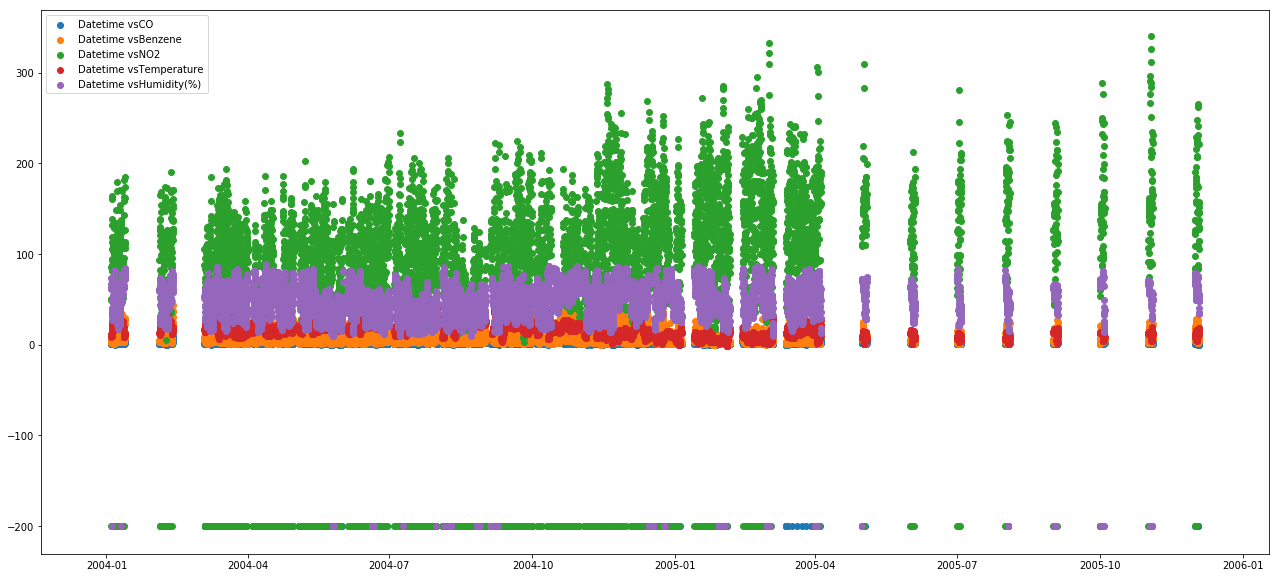

In [8]:
#your code
import matplotlib.pyplot as plt
%matplotlib inline

y_axis_features=["CO","Benzene","NO2","Temperature","Humidity(%)"]
x_axis = data_pp["Datetime"]
plt.rcParams["figure.figsize"] = (22,10)
for i in range(len(y_axis_features)):
    #plt.subplot(1,len(y_axis_features),i+1)
    plt.scatter(x_axis,data_pp[y_axis_features[i]],label="Datetime vs" +y_axis_features[i])
    plt.legend(prop={"size":10})
    

- Data is taken inconsistently i.e data is missing for Feb-04, May-05,Jul-05 etc.
- Implausible values for CO,Humidity(%) and NO2 in all the months when observations were recorded

In [9]:
index_neg = np.where(data_pp["Humidity(%)"]==-200)
len(index_neg[0])

337

Explanation: 

(d) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced, for example, deleting data rows that contain missing/implausible values or replacing them by a value derived from other data points. 

In this question, consider implausible values to be the ones identified in question (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Choose a strategy (or combination of strategies) to handle missing/implausible values. Create a cleaned data set with all those values handled accordingly.
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned data set. Also print the total number of data rows.
    
    4) Motivate and explain your strategy and describe its (dis-)advantages compared to other options. Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.

In [6]:
#your code

Explanation: 

## Question 2 - Data Preprocessing  and Advanced Visualization (15 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv').

(a) To create a suitable input for the following questions, modify the data set as listed below and then print the first 5 data rows:

    - Remove the columns 'Traffic_Volume' and 'Particulate_Matter'
    - Replace the columns 'Date' and 'Time' by a combined column 'Datetime' using the datetime data type
    - Restrict the data to the timeframe between 2004-04-01 and 2005-03-31
    - Drop all rows that contain a missing value or a value below -37
    
*Hint: You may be able to reuse some of your code or data sets created above.*

In [41]:
#your code
main_df = pd.read_csv("AssignmentSecondPartDatasets/air_pollution_2.csv")
main_df.drop(['Traffic_Volume','Particulate_Matter'],axis=1,inplace=True)


In [42]:
main_df['DateTime'] = pd.to_datetime(main_df['Date'] + ' ' + main_df['Time']);
main_df = main_df.drop(['Date', 'Time'], axis=1)

#Restrict the data to the timeframe between 2004-04-01 and 2005-03-31
main_df = main_df[(main_df['DateTime'] > '2004-04-01') & (main_df['DateTime'] < '2005-03-31')];
main_df.head()


,CO,Benzene,NO2,Temperature,Humidity(%),DateTime
0,1.6,4.4,121,12.5,24.0,2004-11-12 01:00:00
1,-200.0,1.8,-200,14.4,60.1,2004-10-05 02:00:00
2,3.0,14.6,103,17.1,61.5,2004-05-05 18:00:00
3,1.3,7.3,72,21.2,63.4,2004-10-24 21:00:00
4,-200.0,4.4,-200,14.8,64.3,2004-10-18 01:00:00


In [43]:
# Drop all rows that contain a missing value
main_df = main_df.dropna()

#droping values below -37 except datetimes
for x in main_df:
    if main_df[x].dtype != 'datetime64[ns]':
        main_df = main_df[(main_df[x] > -37)]
        
main_df.size

29856

(b) For temperature, humidity and CO compute the mean value for each month. Create two stream graphs based on this newly computed data, that visualize the change in temperature, CO and humidity over the months:

    1) For the first stream graph, simply use the mean values you computed for each month.
    
    2) For the second stream graph, first normalize the computed mean values by mapping them individually to an interval between 0 and 1, that is, apply Min-max normalization.

In [44]:
main_df.set_index('DateTime', inplace=True)

temperature_monthly_mean = main_df.Temperature.resample('M').mean();
display(temperature_monthly_mean);

CO_monthly_mean = main_df.CO.resample('M').mean();
display(CO_monthly_mean);

humidity_monthly_mean = main_df['Humidity(%)'].resample('M').mean();
display(humidity_monthly_mean);



DateTime
2004-04-30    18.193603
2004-05-31    21.732710
2004-06-30    25.461411
2004-07-31    26.595489
2004-08-31    26.673294
2004-09-30    23.684010
2004-10-31    21.092289
2004-11-30    14.414000
2004-12-31    13.221782
2005-01-31     7.113976
2005-02-28     7.591771
2005-03-31    15.868778
Freq: M, Name: Temperature, dtype: float64

DateTime
2004-04-30    2.482155
2004-05-31    1.899065
2004-06-30    1.999170
2004-07-31    1.943609
2004-08-31    1.613056
2004-09-30    2.284487
2004-10-31    2.488806
2004-11-30    2.611273
2004-12-31    2.449010
2005-01-31    1.904819
2005-02-28    1.896509
2005-03-31    2.146154
Freq: M, Name: CO, dtype: float64

DateTime
2004-04-30    52.684512
2004-05-31    40.442523
2004-06-30    42.161203
2004-07-31    37.866917
2004-08-31    41.164392
2004-09-30    44.823628
2004-10-31    57.009950
2004-11-30    54.246727
2004-12-31    53.392574
2005-01-31    50.848675
2005-02-28    51.646135
2005-03-31    52.896833
Freq: M, Name: Humidity(%), dtype: float64

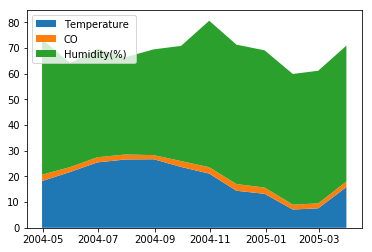

In [14]:
import matplotlib.pyplot as plt
x = list(temperature_monthly_mean.index.date)
y1 = list(temperature_monthly_mean.values)
y2 = list(CO_monthly_mean.values)
y3 = list(humidity_monthly_mean.values)

y = np.vstack([y1, y2, y3])


labels = ["Temperature ", "CO", "Humidity(%)"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()



In [15]:
from sklearn.preprocessing import MinMaxScaler
def scaling(data):
    data=data.reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(data)
    scaled_data=scaler.transform(data)
    return scaled_data
temp_monthly_scaled = scaling(temperature_monthly_mean.values)
CO_monthly_scaled = scaling(CO_monthly_mean.values)
humidity_monthly_scaled =scaling(humidity_monthly_mean.values)




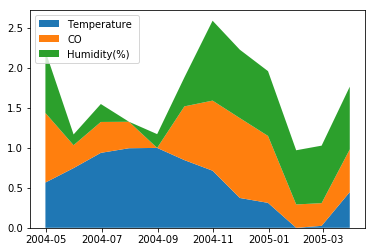

In [16]:
%matplotlib inline
x = list(temperature_monthly_mean.index.date)
y1_s = temp_monthly_scaled.reshape(12)
y2_s = CO_monthly_scaled.reshape(12)
y3_s = humidity_monthly_scaled.reshape(12)

labels = ["Temperature ", "CO", "Humidity(%)"]

fig, ax = plt.subplots()
ax.stackplot(x, y1_s, y2_s, y3_s, labels=labels)
ax.legend(loc='upper left')
plt.show()# for each value the graph goes from (0,1), but since these are stacked all of them don't start from 0.

(c) Answer the following questions based on the stream graphs created in question 2(a) and briefly explain how you derived the answer. Which of the two stream graphs do you consider more adequate to obtain the answers?

    1) In which month is the average CO lowest?
    
    2) Is there any correlation between humidity and CO?
    
    3) Between which months is temperature increasing?

Explanation:
- Avg. CO is lowest in August 2004
- Yes, from fig 2a it appears that humidity(%) and CO values are strongly correlated because they show a similar trend
- May 2004 to Aug 2004 

(d) We want to create a heat map that visualizes the CO measured for different combinations of humidity and temperature. 
The heatmap should have 12 columns and 12 rows. The shown CO value should be the *median* of all values for the combination of humidity and temperature.

Modify the data as needed. Use a binning strategy of your choice for converting numerical data to categorical data. Motivate and explain all your choices and modifications.

(e) Use the modified data to create a heat map as specified in question part (c). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) For which combination of humidity and temperature values is the median CO highest? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Is CO correlating with temperature, humidity, or both?

In [10]:
#your code

Explanation:

## Question 3 - Clustering (15 points): 

(a) For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'). Use a scatter diagram to find the relation between the 'Traffic_Volume' and 'Particulate_Matter' columns.

<IPython.core.display.Javascript object>


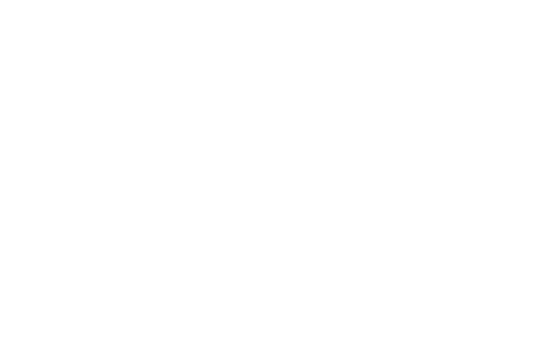

Text(0.5, 1.0, 'Particulate matter vs Traffic Volume')

<IPython.core.display.Javascript object>


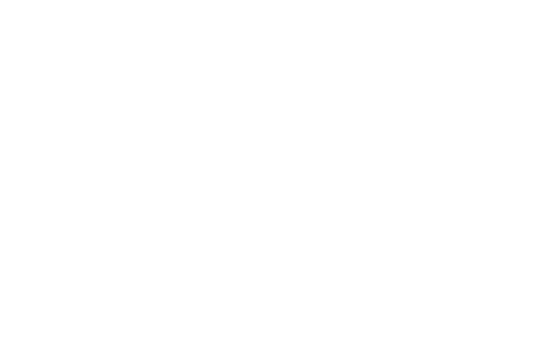

In [118]:
# Your code
from pandas.plotting import scatter_matrix
df_clustering = pd.read_csv("AssignmentSecondPartDatasets/air_pollution_2.csv")
plt.scatter(df_clustering['Particulate_Matter'],df_clustering["Traffic_Volume"])
plt.xlabel("Particulate Matter")
plt.ylabel("Traffic Volume")
plt.title("Particulate matter vs Traffic Volume")

(b) From the previous question you found the relationship between two columns which are suitable for applying clustering methods. Find the two arrays corresponding to these to columns and drop nan values from them. Apply the k_means method for clustering the two mentioned columns. Use three different number of clusters for classifying.

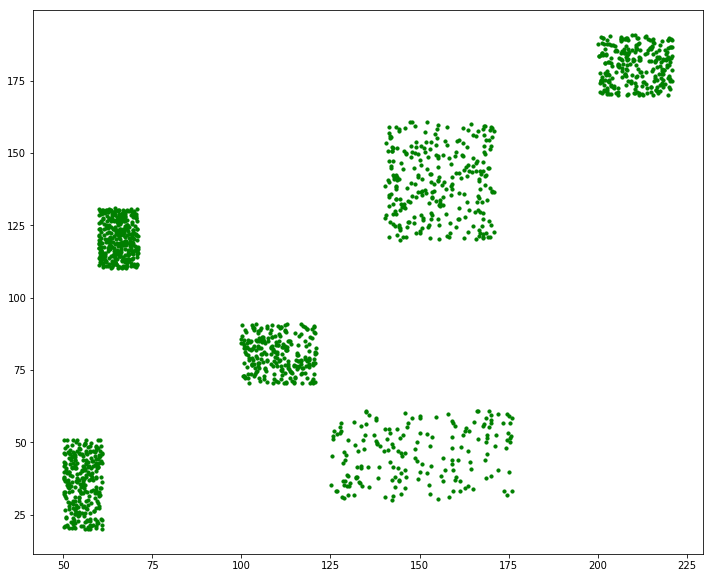

In [96]:
# Your code
Particulate=df_clustering['Particulate_Matter'].dropna().values
Traffic= df_clustering['Traffic_Volume'].dropna().values

# Draw a scatter diagram for showing the distribution of data item in variable 'information' 

plt.rcParams['figure.figsize'] = (12, 10)
plt.scatter(Particulate, Traffic, c='green', s =10)

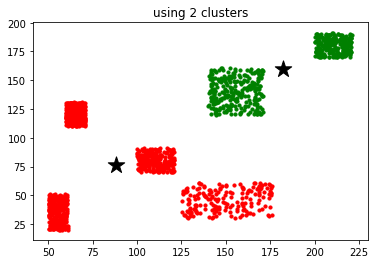

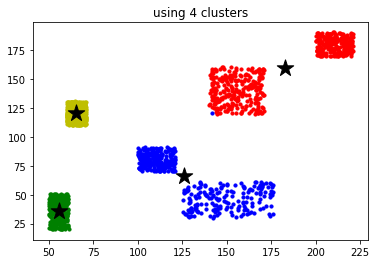

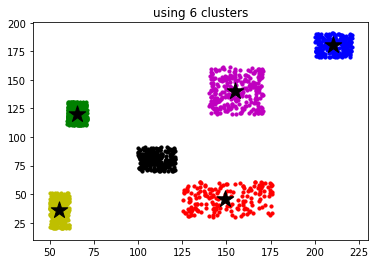

In [162]:
from sklearn.cluster import KMeans
%matplotlib inline
Cluster_data = np.array(list(zip(Particulate,Traffic)))


cluster_num_list = [2,4,6]
for cluster_num in cluster_num_list:
    kmeans = KMeans(cluster_num).fit(Cluster_data)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_

    fig, plots = plt.subplots()
    plt.title("using {} clusters".format(cluster_num))
    colors = ['r', 'g', 'b', 'y', 'm','k']
    for cluster_index in range(cluster_num) :
        sub_set = np.array([Cluster_data[i] for i in range(len(Cluster_data)) if clusters[i] == cluster_index])
        if len(sub_set) == 0 :
            continue
        plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
    plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

I have implemented elbow-test which is not shown here and it shows that k=2 is the best no. centroids for K-means clustering

(c) Apply the DBSCAN method for clustering the two mentioned columns. Use three different eps and min_samples for clustering.

[-1, 0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]


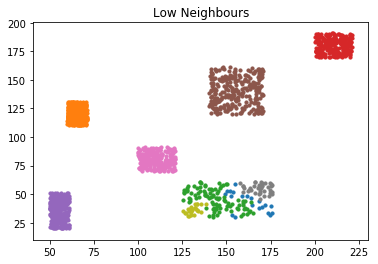

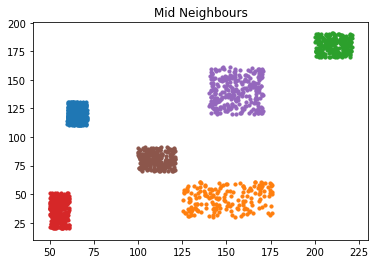

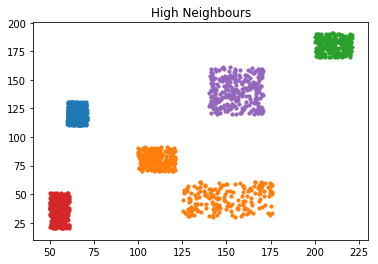

In [152]:
# Your code
from sklearn.cluster import DBSCAN

eps_list=[4,12,22]
min_samples_list=[5,10,20]
type_of_DBSCAN=["Low Neighbours","Mid Neighbours","High Neighbours"]

for i, j,k in zip(eps_list, min_samples_list,type_of_DBSCAN):
    dbscan = DBSCAN(eps = i, min_samples=j).fit(Cluster_data)
    clusters = dbscan.labels_
    cluster_indexs = np.unique(clusters).tolist()
    print(cluster_indexs)

    fig, plots = plt.subplots()
#colors = ['r', 'g', 'b', 'y', 'm','k']
    for cluster_index in cluster_indexs :
        sub_set = np.array([Cluster_data[i] for i in range(len(Cluster_data)) if clusters[i] == cluster_index])
        if len(sub_set) == 0 :
            continue
        plots.scatter(sub_set[:,0], sub_set[:,1],s=10)
        plt.title(k)

(d) Compare k_means and DBSCAN results. Which of these methods is more suitable for clustering this data? Why?

Explanation:
K-means is better method for this data because it can be seen from the scatter plots that the data has globs , therefore, it's is better to select no of cluster centroids first, as we do in K-means

(e) Add noise to the two mentioned columns. For adding noise, first find the range of these two columns and add a random number of 30 samples of noise in the range of each column to that. Plot the scatter diagram again.
Repeat k_means and DBSCAN algorithms for clustering. Which of these methods is more suitable for clustering this data? Why?

In [188]:
# Your code
range_of_Traffic = [Traffic.min(),Traffic.max()]
range_of_Particulate = [Particulate.min(),Particulate.max()]

noise_for_traffic = [np.random.uniform(range_of_Traffic[0],range_of_Traffic[1]) for i in range(30)]
noise_for_particulate= [np.random.uniform(range_of_Particulate[0],range_of_Particulate[1]) for i in range(30)]



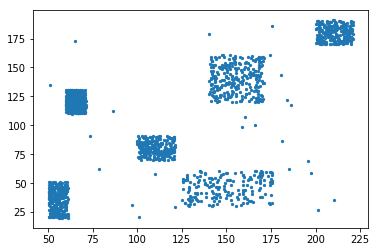

In [199]:
Traffic_new = np.concatenate((Traffic,np.array(noise_for_traffic)),axis=0)
Particulate_new = np.concatenate((Particulate,np.array(noise_for_particulate)),axis=0)
plt.scatter(Particulate_new,Traffic_new,s=5)

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-1, 0, 1, 2, 3, 4, 5]
[-1, 0, 1, 2, 3, 4]


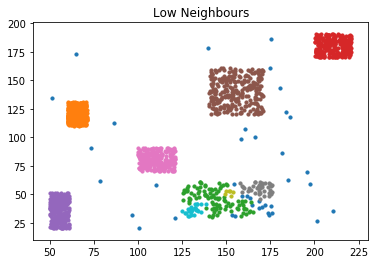

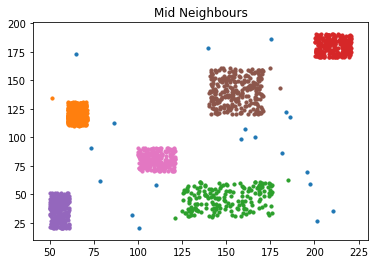

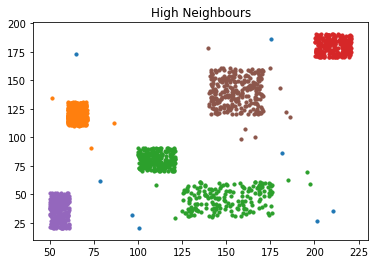

In [203]:
from sklearn.cluster import DBSCAN

Cluster_data_new = np.array(list(zip(Particulate_new,Traffic_new))) 
eps_list=[4,12,20]
min_samples_list=[5,10,20]
type_of_DBSCAN=["Low Neighbours","Mid Neighbours","High Neighbours"]

for i, j,k in zip(eps_list, min_samples_list,type_of_DBSCAN):
    dbscan = DBSCAN(eps = i, min_samples=j).fit(Cluster_data_new)
    clusters = dbscan.labels_
    cluster_indexs = np.unique(clusters).tolist()
    print(cluster_indexs)

    fig, plots = plt.subplots()
#colors = ['r', 'g', 'b', 'y', 'm','k']
    for cluster_index in cluster_indexs :
        sub_set = np.array([Cluster_data_new[i] for i in range(len(Cluster_data_new)) if clusters[i] == cluster_index])
        if len(sub_set) == 0 :
            continue
        plots.scatter(sub_set[:,0], sub_set[:,1],s=10)
        plt.title(k)

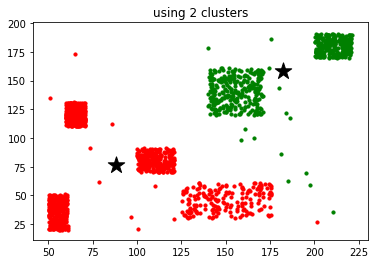

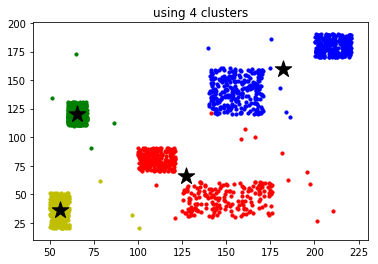

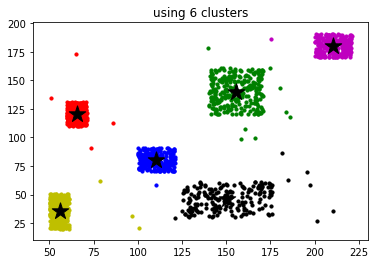

In [202]:
from sklearn.cluster import KMeans
%matplotlib inline
cluster_num_list = [2,4,6]
for cluster_num in cluster_num_list:
    kmeans = KMeans(cluster_num).fit(Cluster_data_new)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_

    fig, plots = plt.subplots()
    plt.title("using {} clusters".format(cluster_num))
    colors = ['r', 'g', 'b', 'y', 'm','k']
    for cluster_index in range(cluster_num) :
        sub_set = np.array([Cluster_data_new[i] for i in range(len(Cluster_data_new)) if clusters[i] == cluster_index])
        if len(sub_set) == 0 :
            continue
        plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
    plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

Explanation:
- As shown above in **DBSCAN** algorithm the noise points which we added later are not categorised in any of the clusters for low values of eps while in case of **K-Means**, in every case these noise points are misclassified into one or the other cluster.

## Question 4 - Frequent itemsets and association rules (15 points): 

(a) You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'applications' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'applications_2.csv' dataset and use that for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [208]:
# Your code
df_applications = pd.read_csv("AssignmentSecondPartDatasets/applications.csv")
df_app_sample = df_applications.sample(frac=0.9,random_state =384146)
df_app_sample.to_csv("AssignmentSecondPartDatasets/applications_2.csv")

(b) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm (Hint: When you are creating rows to make the data_set, you should use none_empty strings).

In [259]:
# Your code
import csv
data_set = []

with open("AssignmentSecondPartDatasets/applications_2.csv") as csvFile:
    reader = csv.reader(csvFile)
    #next(reader)
    for row in reader:
        drop_verbose = " ".join(row)
        drop_verbose_list = drop_verbose.split()
        
        data_set.append(drop_verbose_list)


In [269]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
oht_ary = te.fit(data_set).transform(data_set, sparse=True)
sparse_df = pd.SparseDataFrame(oht_ary, columns=te.columns_, default_fill_value=False)
sparse_df.head()


,0,1,10,100,1000,10000,10001,10003,10004,10005,...,fraude,incomplete,leads,offertes,offertes.1,offertes.2,offertes.3,offertes.4,offertes.5,offertes.6
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [273]:
from mlxtend.frequent_patterns import apriori

frequent = apriori(sparse_df, min_support=0.4,use_colnames=True)


(c) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm having more than 2 members.

In [279]:
# Your code
pd.set_option('display.max_columns', 100)
frequent['length'] = frequent['itemsets'].apply(lambda x: len(x))

frequent[frequent['length'] > 2]

,support,itemsets,length
18,0.582017,"(A_SUBMITTED, A_PARTLYSUBMITTED, A_DECLINED)",3
19,0.564357,"(A_SUBMITTED, A_PARTLYSUBMITTED, A_PREACCEPTED)",3
20,0.564357,"(A_PARTLYSUBMITTED, W_Completeren, A_PREACCEPTED)",3
21,0.564357,"(aanvraag, A_PARTLYSUBMITTED, A_PREACCEPTED)",3
22,0.564357,"(A_SUBMITTED, A_PARTLYSUBMITTED, W_Completeren)",3
23,0.564357,"(aanvraag, A_PARTLYSUBMITTED, A_SUBMITTED)",3
24,0.564357,"(aanvraag, A_PARTLYSUBMITTED, W_Completeren)",3
25,0.564357,"(A_SUBMITTED, W_Completeren, A_PREACCEPTED)",3
26,0.564357,"(aanvraag, A_PREACCEPTED, A_SUBMITTED)",3
27,0.564357,"(aanvraag, W_Completeren, A_PREACCEPTED)",3


(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence and lift of filtered rules in one table.

In [294]:
# Your code
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent, metric="lift", min_threshold=0.8)

In [295]:
rules = rules[(rules['confidence']>=0.3) & (rules['lift']>=1.2)]
rules.drop(["antecedent support","consequent support","leverage","conviction"],axis=1,inplace=True)


In [296]:
rules

,antecedents,consequents,support,confidence,lift
14,(W_Completeren),(A_PREACCEPTED),0.564357,1.0,1.771927
15,(A_PREACCEPTED),(W_Completeren),0.564357,1.0,1.771927
16,(aanvraag),(A_PREACCEPTED),0.564357,1.0,1.771927
17,(A_PREACCEPTED),(aanvraag),0.564357,1.0,1.771927
22,(aanvraag),(W_Completeren),0.564357,1.0,1.771927
23,(W_Completeren),(aanvraag),0.564357,1.0,1.771927
36,"(A_PARTLYSUBMITTED, W_Completeren)",(A_PREACCEPTED),0.564357,1.0,1.771927
37,"(A_PARTLYSUBMITTED, A_PREACCEPTED)",(W_Completeren),0.564357,1.0,1.771927
40,(W_Completeren),"(A_PARTLYSUBMITTED, A_PREACCEPTED)",0.564357,1.0,1.771927
41,(A_PREACCEPTED),"(A_PARTLYSUBMITTED, W_Completeren)",0.564357,1.0,1.771927


## Question 5 - Text Mining (15 points)

Among the datasets given for this assignment you will find the files "pg_train" and "pg_test". These two files contain a labeled corpus, already splitted in training and test set.
The corpus consists of sentences from several novels, labeled with the name of the author. The first task is text classification: you will train a set of classifiers that predict the author of a piece of text.

(a) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier with the author as target.

In [20]:
# Your code

(b) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier with the author as target.


In [21]:
# Your code

(c) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [22]:
# Your code

(d) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier with the author as target.


In [23]:
# Your code

(e) Predict the classification with the four models on the test data.

In [24]:
# Your code

(f) Obtain confusion matrices for the four different models.


In [25]:
# Your code

(g) Obtain accuracy and f1-score for the four different models.


In [26]:
# Your code

(h) Briefly comment on the quality of the predictions for the four models.

Explanation:


(i) For the two authors Austen and Chesterton separately, build a bigram language model. You should use both training and test data to build the model. Do not perform stemming or stopword removal for this task, but do use the other preprocessing steps described in (a). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [27]:
# Your code

(j) For each author, use the correspondent language models from (i) to generate, using MLE, a sentence of fifteen words starting from each of the following terms:

In [28]:
'She'
'They'
'It'

'It'

(k) Now, computer another two models (for Austen and Chesterton separately), build a trigram model with the same data as in (i). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [29]:
# Your code

(l) For each author, use the correspondent language models from (k) to generate, using MLE, a sentence of fifteen words starting from each of the same terms as question (j):

In [30]:
# Your code

(m) Comment on the quality of the models and generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

Explanation:


## Question 6 - Process Mining (15 points)
For this part, refer to the online docs of pm4py (https://pm4py.fit.fraunhofer.de/).
Important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade`.
In this section of the assignment you will be working with a real life event log, derived from the activity of the help desk department of an Italian software company. The data is contained in the file "event_log.xes".

(a) Use the provided event log and identify the least frequent variant and the most frequent variant.


**Some elements and one liners in this exercise have been taken from the source code of pm4py**

In [31]:
# Your code
from pm4py.objects.log.importer.xes import factory as xes_importer

log = xes_importer.import_log('event_log.xes')



In [ ]:
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(log)
variant_count = variants_filter.get_variants_sorted_by_count(variants)

print("most frequent variant is: "+ variant_count[0])

print("least frequent variant is: "+ variant_count[-1])

(b) Remove all the variants that contain less than 1% of the traces in the log. Create a new event log without these variants.

# Model1

In [32]:
# Your code
from pm4py.objects.log.exporter.xes import factory as xes_exporter

filtered_log = variants_filter.filter_log_by_variants_percentage(log,variants,0.99)
xes_exporter.export_log(filtered_log, "eventLog_export.xes")




(c) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without the infrequent variants of question (b)).


In [33]:
# Your code
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory


net, initial_marking, final_marking = inductive_miner.apply(filtered_log)



(d) Perform the token replay conformance checking using your discovered model (c) and the original event log. Does your process model fit the log?


In [34]:
# Your code
from pm4py.algo.conformance.tokenreplay import factory as token_replay


aligned_traces = token_replay.apply(log, net, initial_marking, final_marking)
fit_traces = [x for x in aligned_traces if x['trace_is_fit']]
perc_fitness = 0.00
if len(aligned_traces) > 0:
    perc_fitness = len(fit_traces) / len(aligned_traces)
    print("perc_fitness=", perc_fitness)



Explanation:
Yes it fits to the original event log because the traces which say **"trace is fit = True"** are 91% of the total traces  


(e) Calculate the fitness of the model in (c).

There is a built-in function in pm4py to do this but it was running extremely slow so I have run here seperately

In [35]:
# Your code
def evaluate_fitness(aligned_traces):
    """
    Gets a dictionary expressing fitness in a synthetic way from the list of boolean values
    saying if a trace in the log is fit, and the float values of fitness associated to each trace
    Parameters
    ------------
    aligned_traces
        Result of the token-based replayer
    parameters
        Possible parameters of the evaluation
    Returns
    -----------
    dictionary
        Containing two keys (percFitTraces and averageFitness)
    """
    no_traces = len(aligned_traces)
    fit_traces = len([x for x in aligned_traces if x["trace_is_fit"]])
    sum_of_fitness = sum([x["trace_fitness"] for x in aligned_traces])
    perc_fit_traces = 0.0
    average_fitness = 0.0
    log_fitness = 0
    total_m = sum([x["missing_tokens"] for x in aligned_traces])
    total_c = sum([x["consumed_tokens"] for x in aligned_traces])
    total_r = sum([x["remaining_tokens"] for x in aligned_traces])
    total_p = sum([x["produced_tokens"] for x in aligned_traces])
    if no_traces > 0 and total_c > 0 and total_p > 0:
        perc_fit_traces = float(100.0 * fit_traces) / float(no_traces)
        average_fitness = float(sum_of_fitness) / float(no_traces)
        log_fitness = 0.5 * (1 - total_m / total_c) + 0.5 * (1 - total_r / total_p)
    return {"perc_fit_traces": perc_fit_traces, "average_trace_fitness": average_fitness, "log_fitness": log_fitness}

fitness=evaluate_fitness(aligned_traces)

print("percent fitness: {}".format(fitness.get('perc_fit_traces')))
print("average fitness: {}".format(fitness.get('average_trace_fitness')))
print("log fitness: {}".format(fitness.get('log_fitness')))


(f) Are there any deviations between the process model and the event log? If so, where and why?

Explanation:



(g) Now use the original event log and remove the two most frequent variants, and discover the model based on your new event log (the filtered log without two most frequent variants).


# Model 2

In [36]:
# Your code
from copy import deepcopy


def get_dict_wo_key(dictionary, key):
    """Returns a **deep** copy of the dictionary without a key."""
    _dict = deepcopy(dictionary)
    _dict.pop(key, None)
    return _dict

new_var = get_dict_wo_key(variants,'Assign seriousness,Take in charge ticket,Resolve ticket,Closed')
new_var = get_dict_wo_key(new_var,'Assign seriousness,Take in charge ticket,Wait,Resolve ticket,Closed')


In [ ]:
filtered_log_g = variants_filter.apply(log, new_var)

In [1]:
net, initial_marking, final_marking = inductive_miner.apply(filtered_log_g)

NameError: name 'inductive_miner' is not defined

(h) Perform the token replay conformance checking using the newly discovered model of question (g) and the original event log. Does your process model fit the log?

In [37]:
# Your code
aligned_traces = token_replay.apply(log, net, initial_marking, final_marking)
fitness=evaluate_fitness(aligned_traces)

print("percent fitness: {}".format(fitness.get('perc_fit_traces')))
print("average fitness: {}".format(fitness.get('average_trace_fitness')))
print("log fitness: {}".format(fitness.get('log_fitness')))


Explanation:


(i) Calculate the fitness of the model in (g).

In [38]:
# Your code

(j) Are there any deviations in the process model? If so, where and why?

Explanation: 

(k) Use the complete event log (original event log) and discover your process model using Inductive Miner.


# Model 3

In [2]:
# Your code
net, initial_marking, final_marking = inductive_miner.apply(log)


NameError: name 'inductive_miner' is not defined

(l) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit the log?

In [40]:
# Your code
# Your code
aligned_traces = token_replay.apply(log, net, initial_marking, final_marking)
fitness=evaluate_fitness(aligned_traces)

print("percent fitness: {}".format(fitness.get('perc_fit_traces')))
print("average fitness: {}".format(fitness.get('average_trace_fitness')))
print("log fitness: {}".format(fitness.get('log_fitness')))


Explanation: No it doesn't fit perfectly to the log, it could be because of lack of data for few variants

(m) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Explanation:
First model formed by removing the least frequent variants fits the best to the log because it prevents overfitting.


(n) Visualize the model discovered in question (k) enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

# Visualization with frequency

In [41]:
# Your code
from pm4py.visualization.dfg import factory as dfg_vis_factory

tree = inductive_miner.apply_tree(log)

from pm4py.algo.discovery.dfg import factory as dfg_factory

dfg = dfg_factory.apply(log)

gviz_dfg = dfg_vis_factory.apply(dfg, log=log, variant='frequency')
dfg_vis_factory.view(gviz_dfg)

# Visualization with performance

In [ ]:
gviz_dfg = dfg_vis_factory.apply(dfg, log=log, variant='performance')
dfg_vis_factory.view(gviz_dfg)

(o) If you were the process owner and you had more resources to hire employees, on which parts of the process would you assign them to maximize efficiency?

Explanation:


(p) Add your further comments and considerations on the frequency and performance informations. Does the process have a "happy path", and is it shown in the enhanced process models? Where are the major bottlenecks in this process? Is there any rework?

Explanation:
